In [1]:
%reload_ext autoreload
%autoreload 2
import sys
sys.path.append("../classifier")
from data import DataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import utils
import numpy as np
import matplotlib.gridspec as gridspec
from settings import configs, tasks

Using TensorFlow backend.


In [63]:
batch_size = 5
input_width = 160
input_height = 128

def resize(img):
    return utils.resize_img(img, target_size=(input_height, input_width))
    
training_data_dir = '../../datasets/moments_video_frames/validation'
generator = DataGenerator(seq_length=10,
                          sample_step=3,
                          batch_size=batch_size,
                          seq_overlap=5,
                          min_seq_length=10,
                          #pad_sequences=True,
                          max_seq_per_source=5,
                          rescale= 1./255,
                          target_size=None,
                          shuffle=False,
                          fn_preprocess=resize,
                          output_mode='error',
                          return_sources=True,
                          classes=['twisting'],
                          index_start=0,
                          max_per_class=None)
generator = generator.flow_from_directory(training_data_dir)
iterator = iter(generator)

Found 1504 samples belonging to 1 classes in ../../datasets/moments_video_frames/validation
Found 250 sequences belonging to 1 classes
Sequence distribution:
- 250 sequences of length 10
Total samples used: 1500
Data shape: (10, 128, 160, 3)


In [19]:
def predict_frames(model, actual_frames):
    
    layer_config = model.layers[1].get_config()
    data_format = layer_config['data_format'] if 'data_format' in layer_config else layer_config['dim_ordering']
    
    if data_format == 'channels_first':
        actual_frames = np.transpose(actual_frames, (0, 1, 4, 2, 3))
    
    X_hat = model.predict(actual_frames)
    if data_format == 'channels_first':
        X_hat = np.transpose(X_hat, (0, 1, 3, 4, 2))
    return X_hat

def plot(frames, label):
    # Plot some predictions
    n_timesteps =  frames.shape[0]
    aspect_ratio = float(frames.shape[1]) / frames.shape[2]
    plt.figure(figsize = (4 * n_timesteps, 8 * aspect_ratio))
    gs = gridspec.GridSpec(2, n_timesteps)
    gs.update(wspace=0., hspace=0.)
    #plot_save_dir = os.path.join(results_dir, 'prediction_plots/')
    #if not os.path.exists(plot_save_dir): os.makedirs(plot_save_dir)

    for t in range(len(frames)):
        plt.subplot(gs[t])
        plt.imshow(frames[t], interpolation='none')
        plt.tick_params(axis='both', which='both', 
                        bottom=False, top=False, 
                        left=False, right=False, 
                        labelbottom=False, labelleft=False)
        if t==0: plt.ylabel(label, fontsize=16)

    #plt.savefig(plot_save_dir +  'plot_' + str(i) + '.png')
    #plt.clf()
    plt.show()

In [4]:
FLAGS = {
    'config': 'prednet_random__moments__prediction',
}
config_name, config = utils.get_config(FLAGS)
config['batch_size'] = batch_size
model_prediction_random = utils.create_model(train=False, **config)

FLAGS = {
    'config': 'prednet_kitti__moments__prediction',
}
config_name, config = utils.get_config(FLAGS)
config['batch_size'] = batch_size
model_prediction_kitti = utils.create_model(train=False, **config)

FLAGS = {
    'config': 'prednet_kitti_finetuned_moments__prediction',
    'pretrained': '3c'
}
'''
config_name, config = utils.get_config(FLAGS)
config['batch_size'] = batch_size
model_prediction_3c = utils.create_model(train=False, **config)

FLAGS['pretrained'] = '10c'
config_name, config = utils.get_config(FLAGS)
config['batch_size'] = batch_size
model_prediction_10c = utils.create_model(train=False, **config)'''

FLAGS['pretrained'] = 'full'
config_name, config = utils.get_config(FLAGS)
config['batch_size'] = batch_size
model_prediction_full = utils.create_model(train=False, **config)

None
./kitti/model_data/kitti_keras/prednet_kitti_weights.hdf5
./results/prednet_kitti__moments__model__full/weights.hdf5


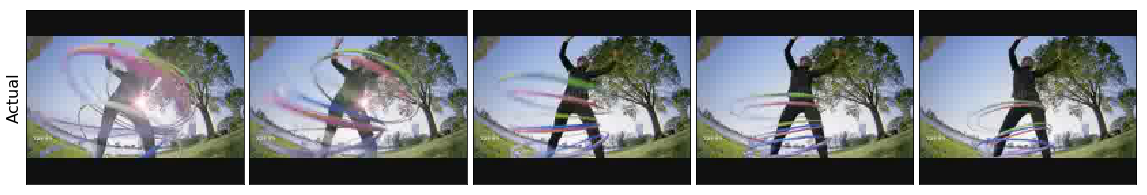

In [83]:
X, y, sources = next(iterator)
plot(X[0, 5:10], 'Actual')

In [72]:
X_hat_random = predict_frames(model_prediction_random, X)
print(X_hat_random.shape)
X_hat_kitti = predict_frames(model_prediction_kitti, X)
print(X_hat_kitti.shape)
X_hat_full = predict_frames(model_prediction_full, X)
print(X_hat_full.shape)

(5, 10, 128, 160, 3)
(5, 10, 128, 160, 3)
(5, 10, 128, 160, 3)


### Running

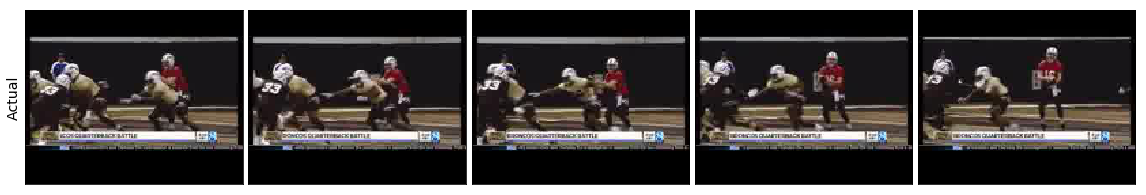

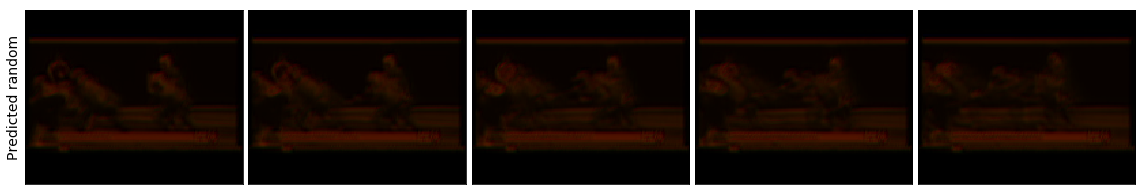

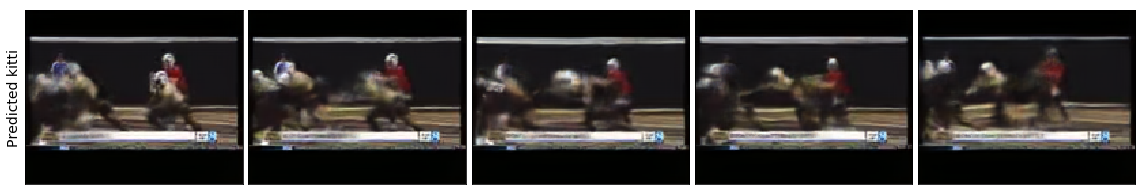

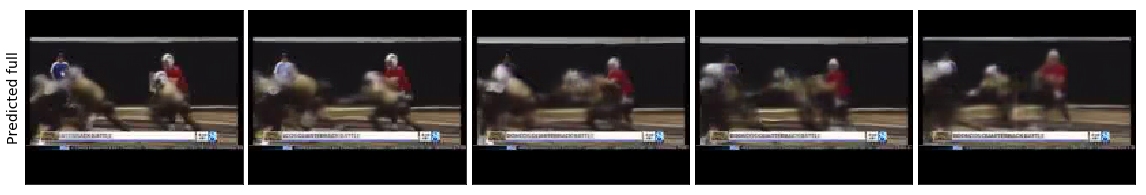

In [13]:
i = 4
plot(X[i, 5:10], 'Actual')
plot(X_hat_random[i, 5:10], 'Predicted random')
plot(X_hat_kitti[i, 5:10], 'Predicted KITTI')
plot(X_hat_full[i, 5:10], 'Predicted Moments')

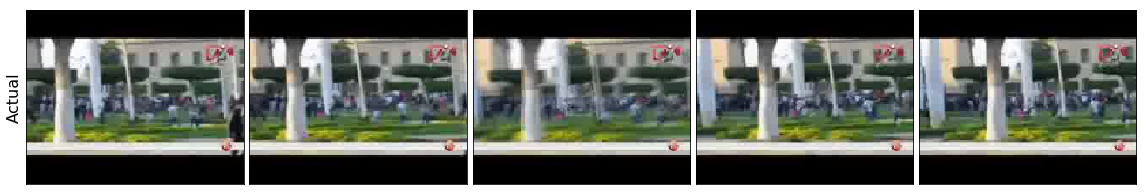

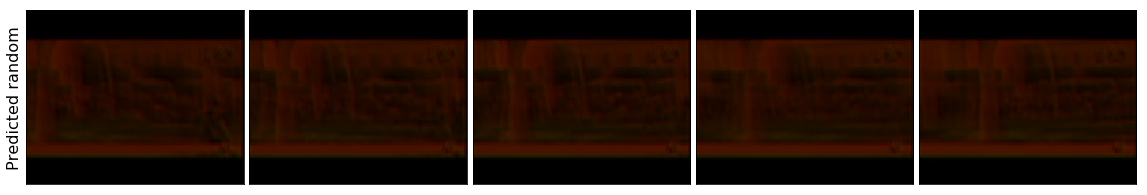

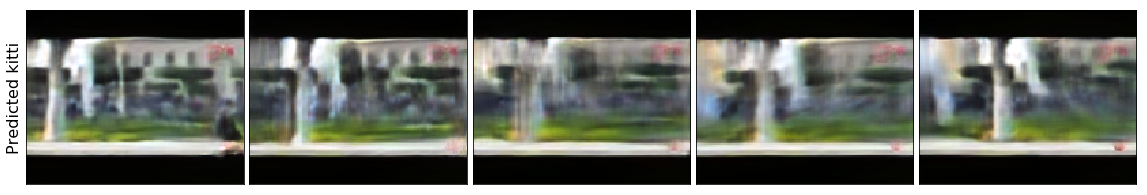

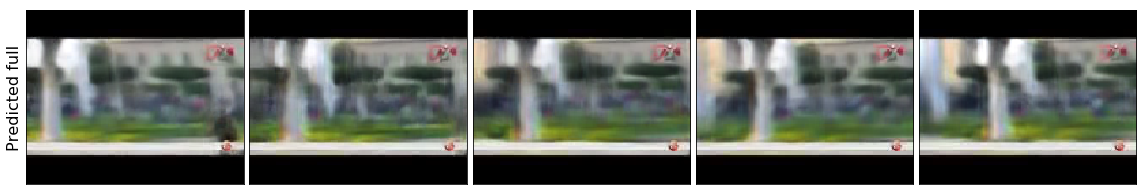

In [21]:
i = 4
plot(X[i, 5:10], 'Actual')
plot(X_hat_random[i, 5:10], 'Predicted random')
plot(X_hat_kitti[i, 5:10], 'Predicted kitti')
plot(X_hat_full[i, 5:10], 'Predicted full')

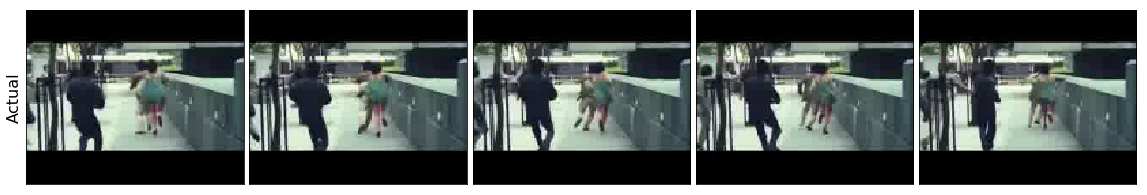

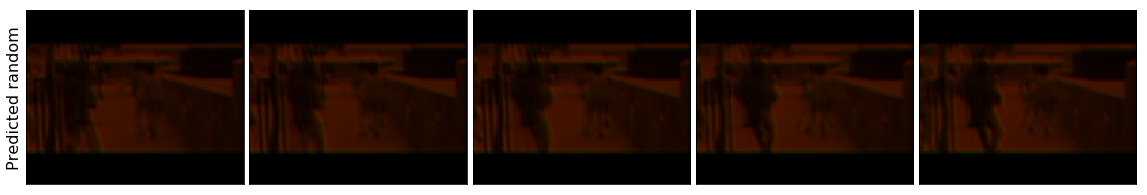

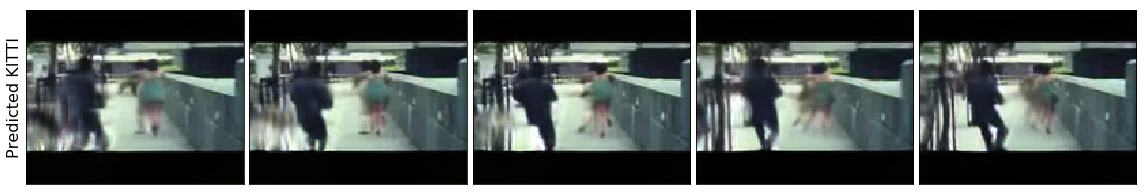

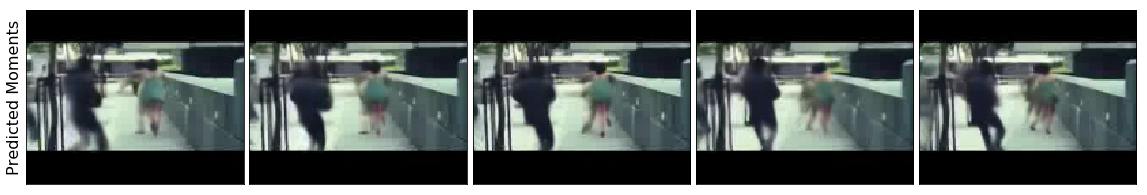

In [25]:
i = 3
plot(X[i, 5:10], 'Actual')
plot(X_hat_random[i, 5:10], 'Predicted random')
plot(X_hat_kitti[i, 5:10], 'Predicted KITTI')
plot(X_hat_full[i, 5:10], 'Predicted Moments')

### Dancing

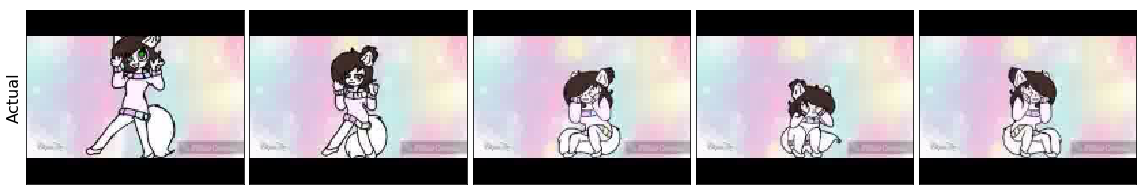

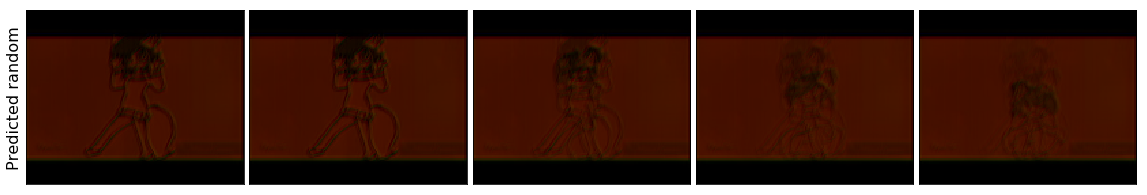

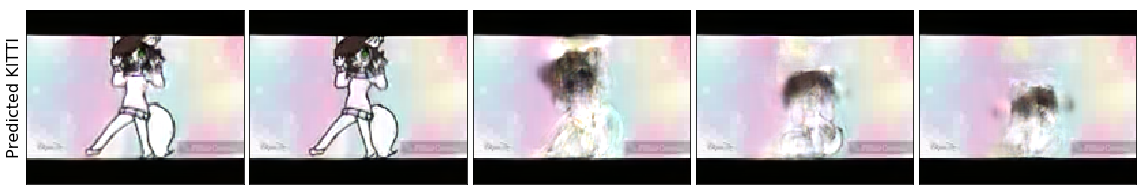

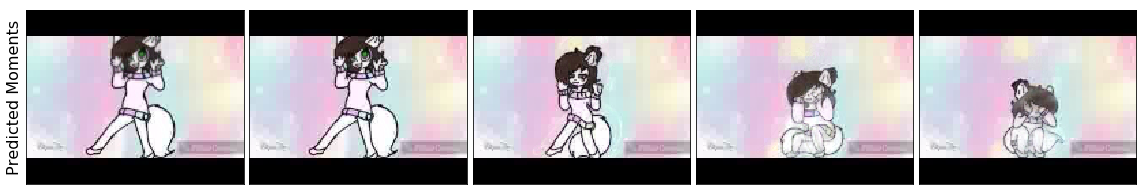

In [34]:
i = 4
plot(X[i, 5:10], 'Actual')
plot(X_hat_random[i, 5:10], 'Predicted random')
plot(X_hat_kitti[i, 5:10], 'Predicted KITTI')
plot(X_hat_full[i, 5:10], 'Predicted Moments')

### Exercising

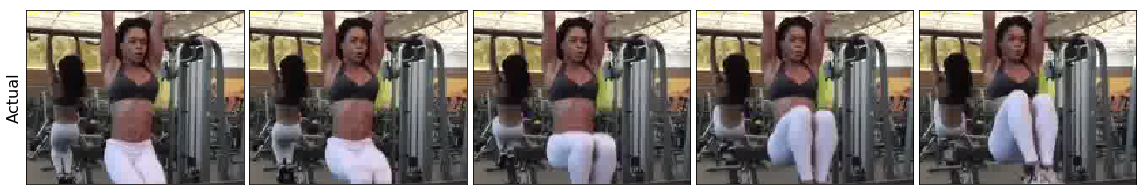

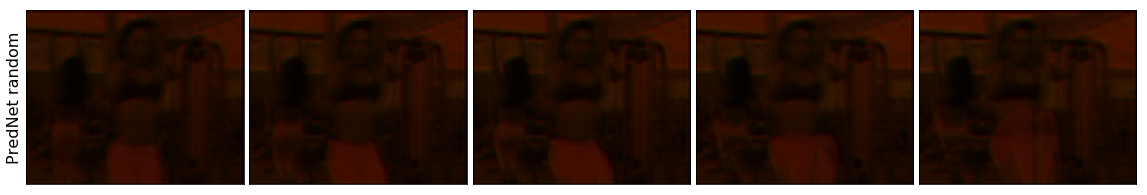

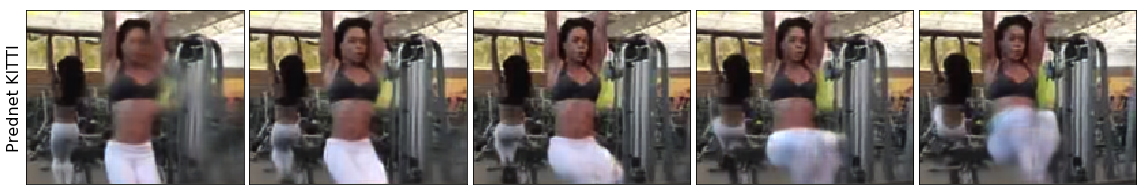

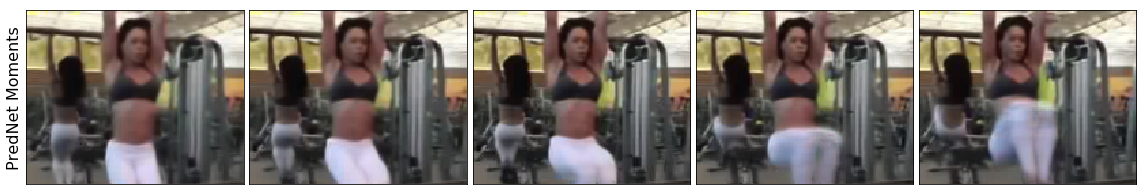

In [49]:
i = 4
plot(X[i, 5:10], 'Actual')
plot(X_hat_random[i, 5:10], 'PredNet random')
plot(X_hat_kitti[i, 5:10], 'Prednet KITTI')
plot(X_hat_full[i, 5:10], 'PredNet Moments')

### Twisting

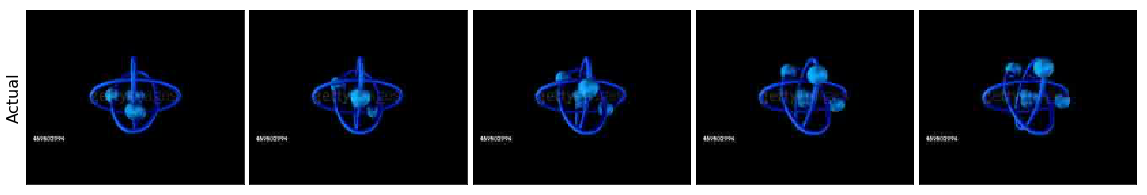

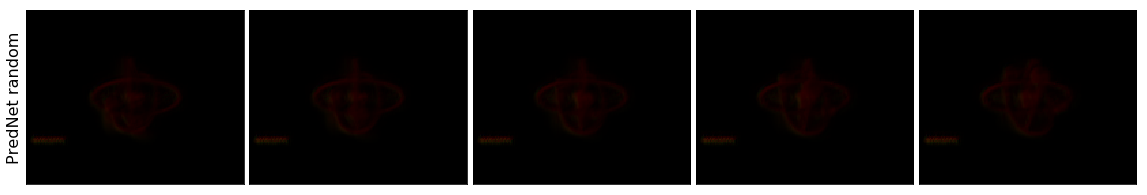

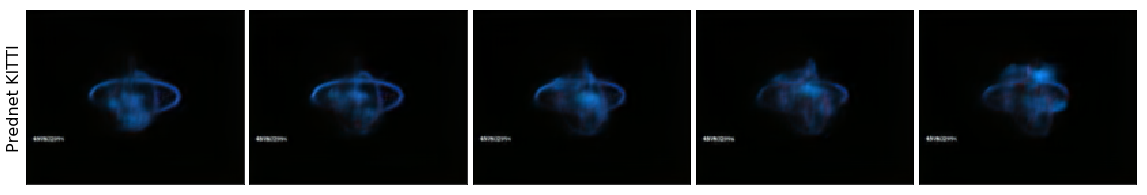

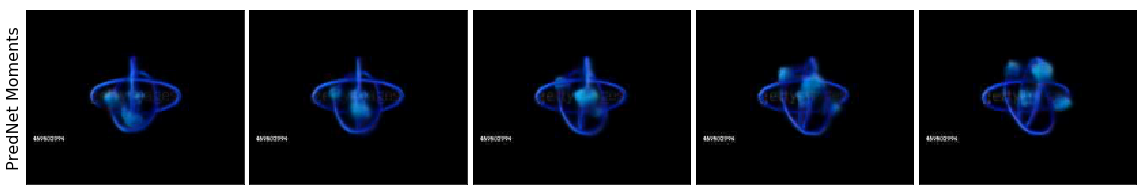

In [73]:
i = 0
plot(X[i, 5:10], 'Actual')
plot(X_hat_random[i, 5:10], 'PredNet random')
plot(X_hat_kitti[i, 5:10], 'Prednet KITTI')
plot(X_hat_full[i, 5:10], 'PredNet Moments')